## KNN

## Glass Data
### Prepare a model for Glass Classification using KNN

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,plot_confusion_matrix

## 2. Import Data

In [2]:
glass_data=pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## 3. Data Understanding

**Data Description:**
- RI : refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- AI: Aluminum
- Si: Silicon
- K:Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

**Type: Type of glass: (class attribute)**
 1. building_windows_float_processed
 2. building_windows_non_float_processed
 3. vehicle_windows_float_processed
 4. vehicle_windows_non_float_processed (none in this database)
 5. containers
 6. tableware
 7. headlamps

### 3.1 Initial Analysis

In [3]:
glass_data.shape

(214, 10)

In [4]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### 3.2 Data Visualization

#### Checking Outliers

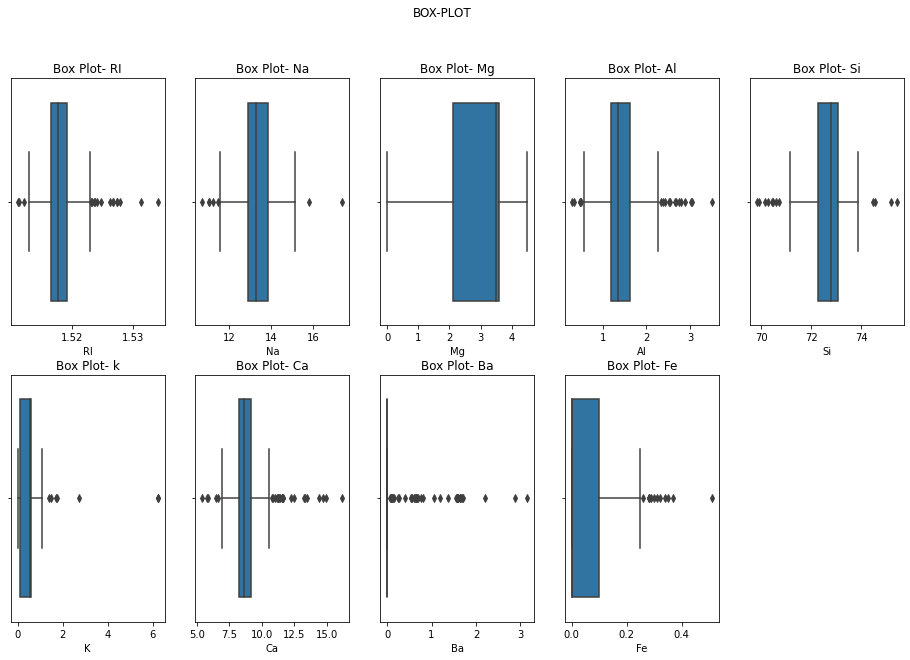

In [7]:
plt.figure(figsize=(16,10))
plt.subplot(2,5,1)
sns.boxplot(x='RI', data=glass_data)
plt.title('Box Plot- RI')
plt.subplot(2,5,2)
sns.boxplot(x='Na', data=glass_data)
plt.title('Box Plot- Na')
plt.subplot(2,5,3)
sns.boxplot(x='Mg', data=glass_data)
plt.title('Box Plot- Mg')
plt.subplot(2,5,4)
sns.boxplot(x='Al', data=glass_data)
plt.title('Box Plot- Al')
plt.subplot(2,5,5)
sns.boxplot(x='Si', data=glass_data)
plt.title('Box Plot- Si')
plt.subplot(2,5,6)
sns.boxplot(x='K', data=glass_data)
plt.title('Box Plot- k')
plt.subplot(2,5,7)
sns.boxplot(x='Ca', data=glass_data)
plt.title('Box Plot- Ca')
plt.subplot(2,5,8)
sns.boxplot(x='Ba', data=glass_data)
plt.title('Box Plot- Ba')
plt.subplot(2,5,9)
sns.boxplot(x='Fe', data=glass_data)
plt.title('Box Plot- Fe')
plt.suptitle('BOX-PLOT')
plt.show()

#### Output Variable Distribution

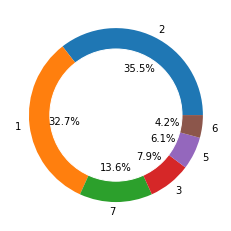

In [8]:
plt.pie(x=glass_data['Type'].value_counts(), labels=[2,1,7,3,5,6], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

### 4. Data Preparation

Since KNN uses distence measure, we need to scale the input features

In [9]:
min_max_scalar=MinMaxScaler()
glass_data.iloc[:,0:9]=min_max_scalar.fit_transform(glass_data.iloc[:,0:9])
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,1


## 5. Data Building 

In [10]:
X=glass_data.drop('Type', axis=1)
y=glass_data[['Type']]

In [11]:
X.shape, y.shape

((214, 9), (214, 1))

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10, shuffle=True, stratify=y)

In [13]:
X_train.shape, y_train.shape

((171, 9), (171, 1))

In [14]:
X_test.shape, y_test.shape

((43, 9), (43, 1))

## 6. Model Training 

In [15]:
knn_classifier= KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

## 7. Model Testing || 8. Model Evaluation 

### For Training dataset 

In [16]:
y_pred_train=knn_classifier.predict(X_train)

In [17]:
print('Accuracy Score:',accuracy_score(y_train, y_pred_train))

Accuracy Score: 0.7953216374269005


In [18]:
print('Confusion Matrix:\n',confusion_matrix(y_train, y_pred_train))

Confusion Matrix:
 [[49  6  1  0  0  0]
 [ 9 51  0  1  0  0]
 [ 9  2  3  0  0  0]
 [ 0  0  0  9  0  1]
 [ 0  1  0  0  6  0]
 [ 1  1  0  1  2 18]]


In [19]:
print('Classification Report:\n',classification_report(y_train, y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.88      0.79        56
           2       0.84      0.84      0.84        61
           3       0.75      0.21      0.33        14
           5       0.82      0.90      0.86        10
           6       0.75      0.86      0.80         7
           7       0.95      0.78      0.86        23

    accuracy                           0.80       171
   macro avg       0.80      0.74      0.75       171
weighted avg       0.80      0.80      0.78       171



### For Testing dataset

In [20]:
y_pred_test=knn_classifier.predict(X_test)

In [21]:
print('Accuracy Score:',accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.6511627906976745


In [22]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[14  0  0  0  0  0]
 [ 7  8  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  1  1  0]
 [ 0  1  0  0  0  5]]


In [23]:
print('Classification Report:\n',classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           1       0.61      1.00      0.76        14
           2       0.62      0.53      0.57        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.65        43
   macro avg       0.54      0.48      0.48        43
weighted avg       0.60      0.65      0.60        43



### Let us choose the Optimal number for Neighbors:

In [24]:
k_fold=KFold(n_splits=5, shuffle=True, random_state=10)
cv_scores=[]

for i in range(1,31):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    cross_val_scores=cross_val_score(estimator=knn_classifier, X=X, y=y, cv=k_fold)
    print(i,'th Iteration\n', cross_val_scores.mean().round(4))
    cv_scores.append(cross_val_scores.mean().round(4))

1 th Iteration
 0.6919
2 th Iteration
 0.659
3 th Iteration
 0.6918
4 th Iteration
 0.6543
5 th Iteration
 0.6451
6 th Iteration
 0.6311
7 th Iteration
 0.5984
8 th Iteration
 0.6265
9 th Iteration
 0.6033
10 th Iteration
 0.6126
11 th Iteration
 0.5847
12 th Iteration
 0.5891
13 th Iteration
 0.608
14 th Iteration
 0.6266
15 th Iteration
 0.6125
16 th Iteration
 0.6218
17 th Iteration
 0.6126
18 th Iteration
 0.6312
19 th Iteration
 0.6453
20 th Iteration
 0.6218
21 th Iteration
 0.6171
22 th Iteration
 0.6405
23 th Iteration
 0.636
24 th Iteration
 0.6315
25 th Iteration
 0.6312
26 th Iteration
 0.6266
27 th Iteration
 0.6124
28 th Iteration
 0.5937
29 th Iteration
 0.5797
30 th Iteration
 0.589


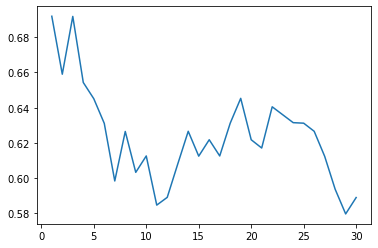

In [25]:
plt.plot(range(1,31),cv_scores)
plt.show()

#### From the plot, we can say that K=3 is the best neighbour.

##  Model Training 

In [26]:
knn_classifier= KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Model Testing || Model Evaluation 

### For Training dataset 

In [27]:
y_pred_train=knn_classifier.predict(X_train)

In [28]:
print('Accuracy Score:',accuracy_score(y_train, y_pred_train))

Accuracy Score: 0.8128654970760234


In [29]:
print('Confusion Matrix:\n',confusion_matrix(y_train, y_pred_train))

Confusion Matrix:
 [[49  6  1  0  0  0]
 [ 8 52  1  0  0  0]
 [ 6  2  6  0  0  0]
 [ 0  1  0  8  0  1]
 [ 0  1  0  0  6  0]
 [ 1  1  0  1  2 18]]


In [30]:
print('Classification Report:\n',classification_report(y_train, y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.88      0.82        56
           2       0.83      0.85      0.84        61
           3       0.75      0.43      0.55        14
           5       0.89      0.80      0.84        10
           6       0.75      0.86      0.80         7
           7       0.95      0.78      0.86        23

    accuracy                           0.81       171
   macro avg       0.82      0.77      0.78       171
weighted avg       0.82      0.81      0.81       171



### For Testing dataset

In [31]:
y_pred_test=knn_classifier.predict(X_test)

In [32]:
print('Accuracy Score:',accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.6744186046511628


In [33]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 5  9  1  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  0  0  1  1  0]
 [ 1  0  0  0  0  5]]


In [34]:
print('Classification Report:\n',classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.93      0.74        14
           2       0.69      0.60      0.64        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.67        43
   macro avg       0.64      0.53      0.56        43
weighted avg       0.66      0.67      0.65        43



<Figure size 720x864 with 0 Axes>

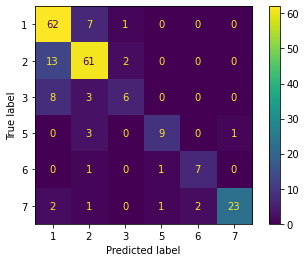

In [35]:
plt.figure(figsize=(10,12))
plot_confusion_matrix(estimator=knn_classifier,X=X,y_true=y)
plt.show()